# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-01-04 10:35:10--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-01-04 10:35:10--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.138, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0gslab7pa19nt3v9cubr92mfhin1ktdq/1641292500000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-01-04 10:35:11--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('data/train.csv')

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 👋 실습
---


### seaborn pairplot

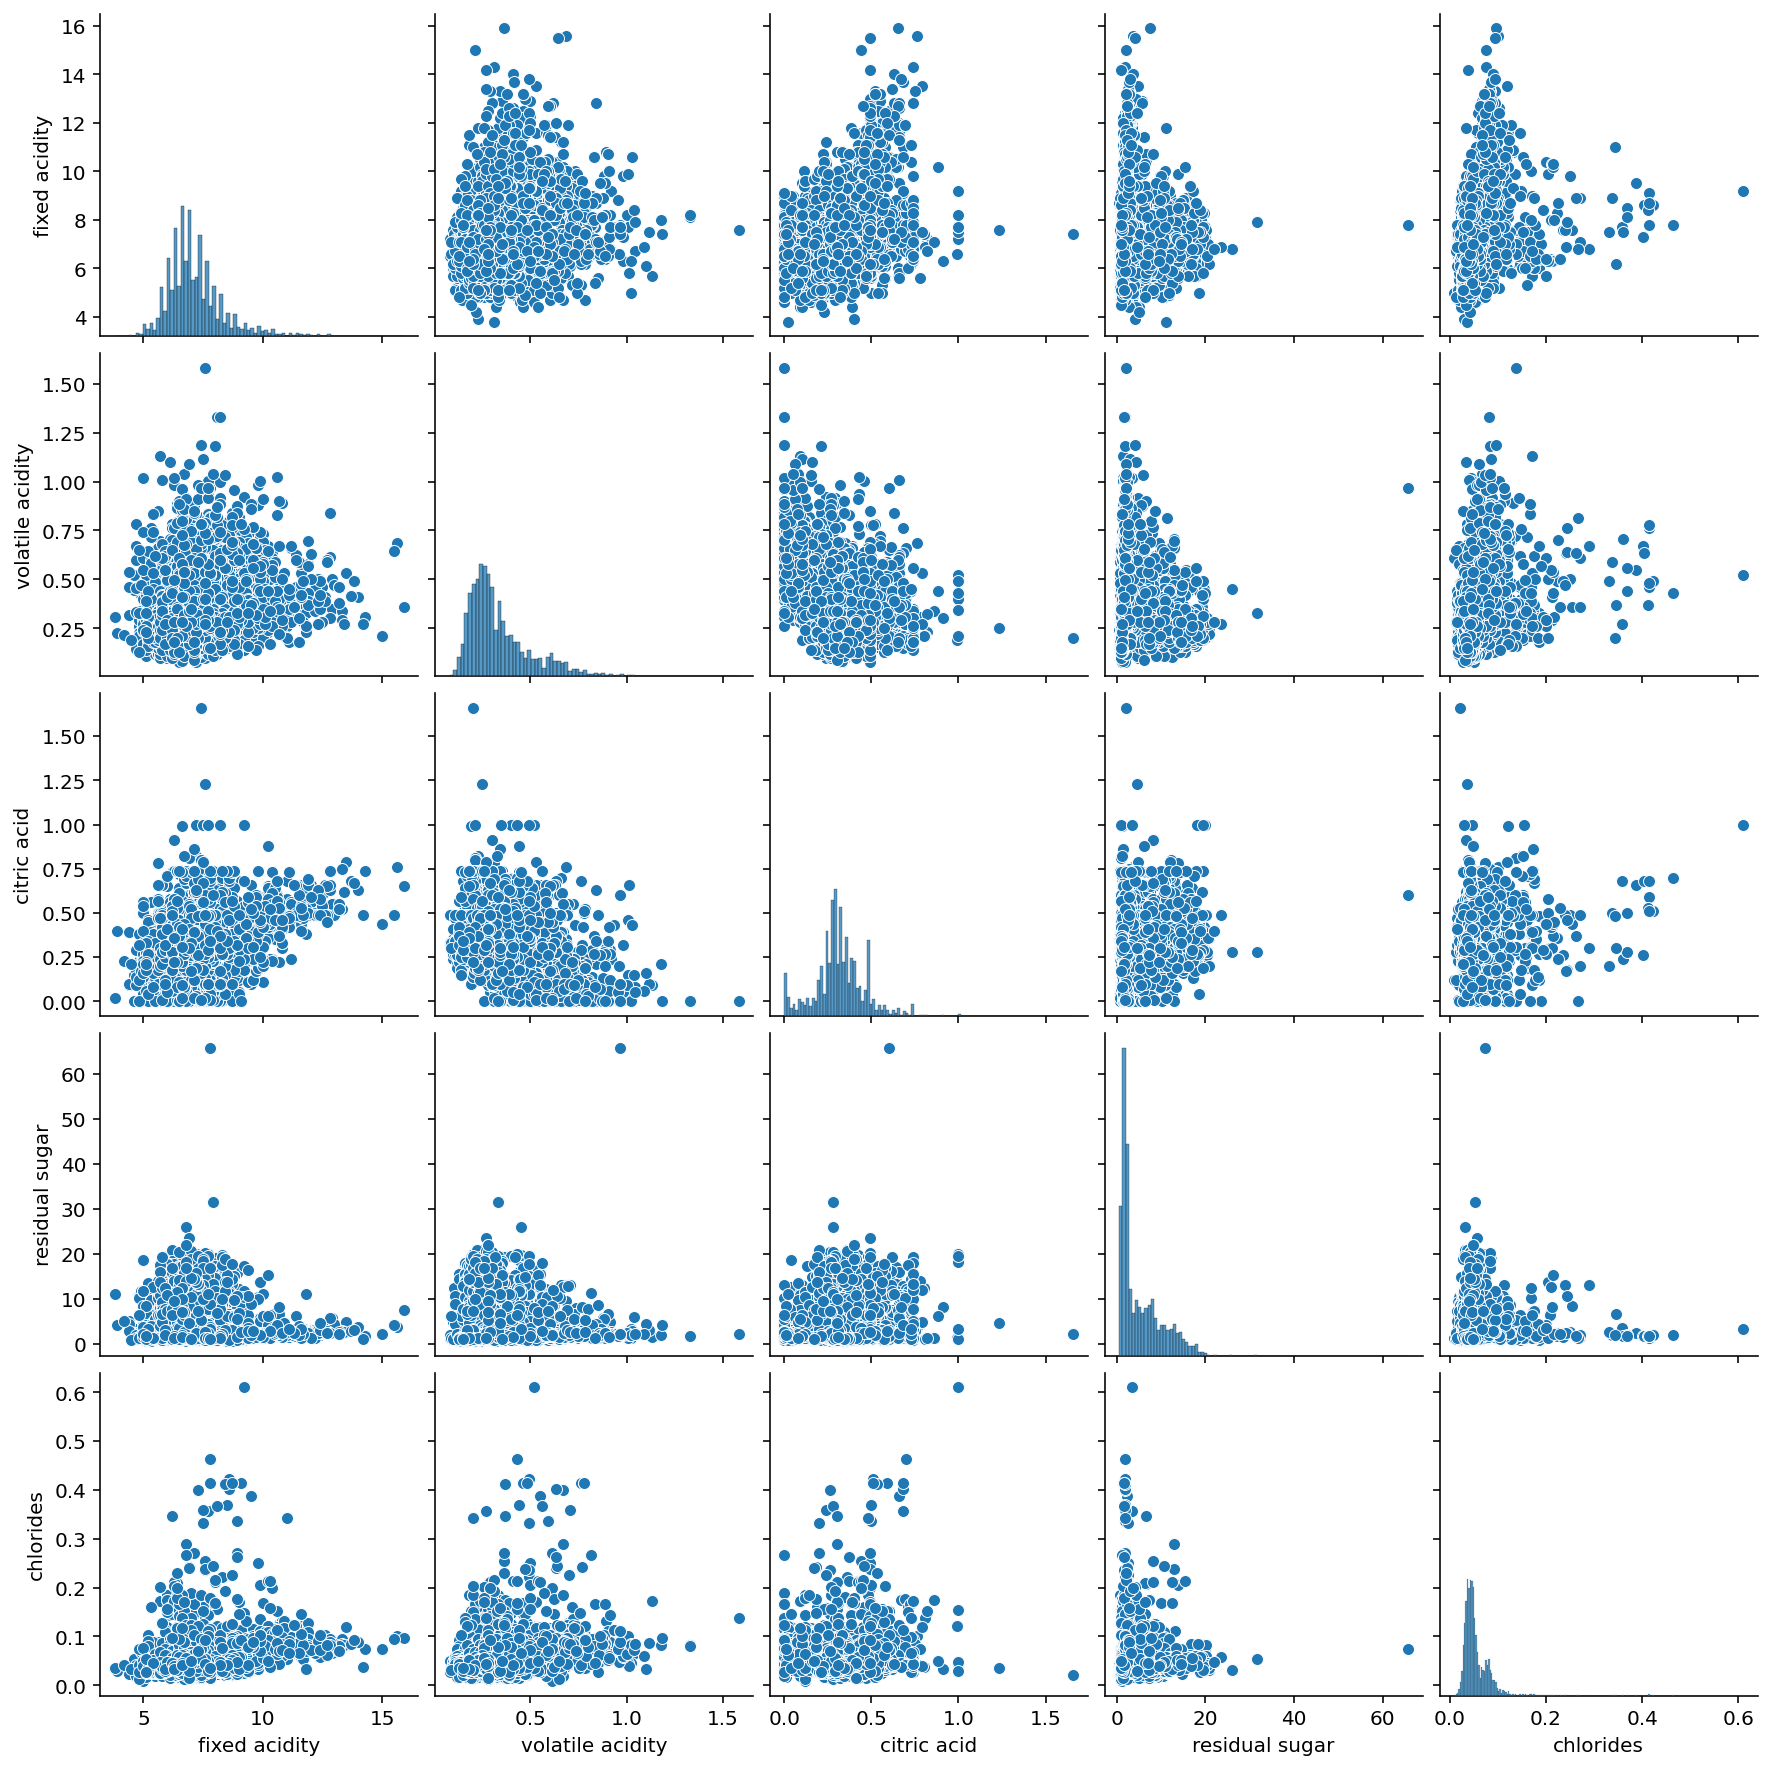

In [4]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요
data = train.loc[:,'fixed acidity':'chlorides']
# data의 pairplot을 그려보세요
sns.pairplot(data)

### seaborn distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


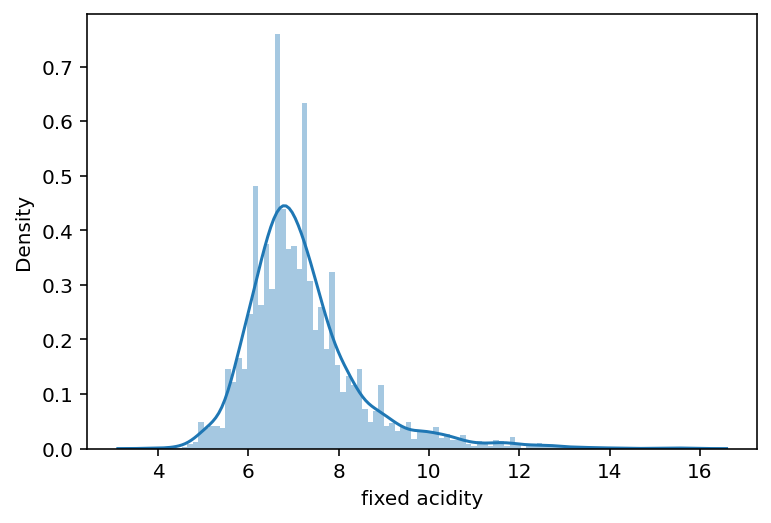

In [5]:
# 히스토그램을 그릴 변수 지정(변수는 1개만)
data = train['fixed acidity']
#distplot 함수로 히스토그램을 그립니다.
sns.distplot(data, bins=100)

### seaborn heatmap

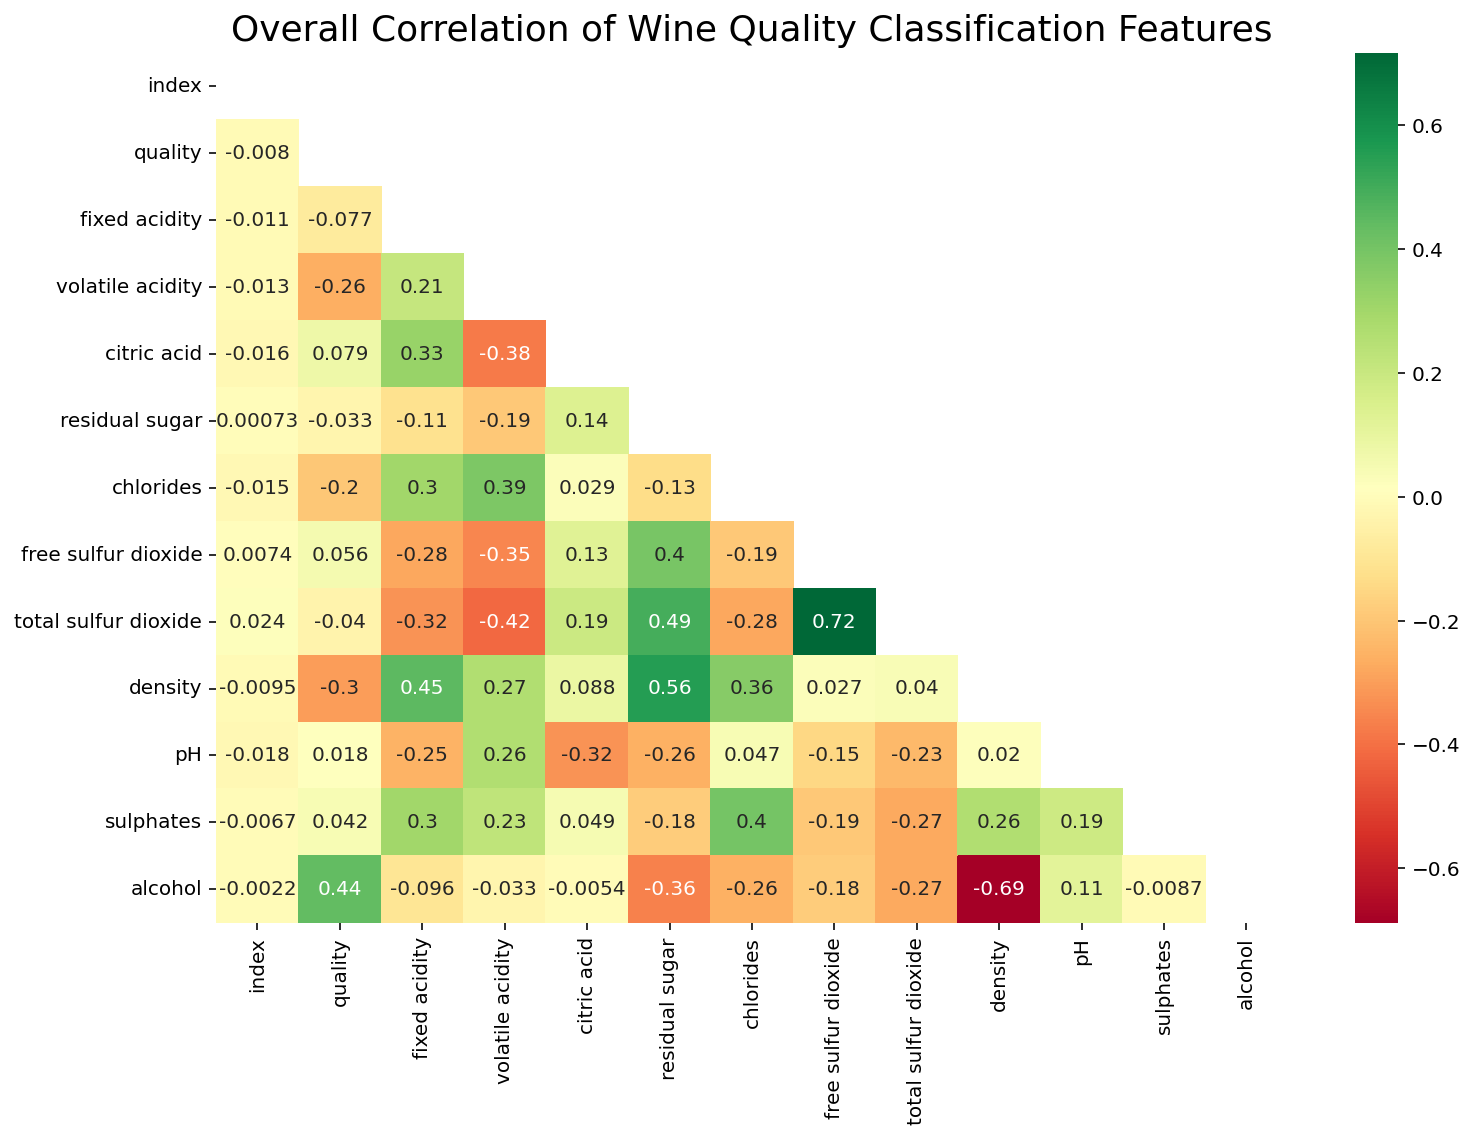

In [6]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )
# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.
corr = train.corr()

# mask setup
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# graph size
plt.figure(figsize = (12,8))

# graph title
plt.title('Overall Correlation of Wine Quality Classification Features', fontsize=18)

# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn')

### seaborn Scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


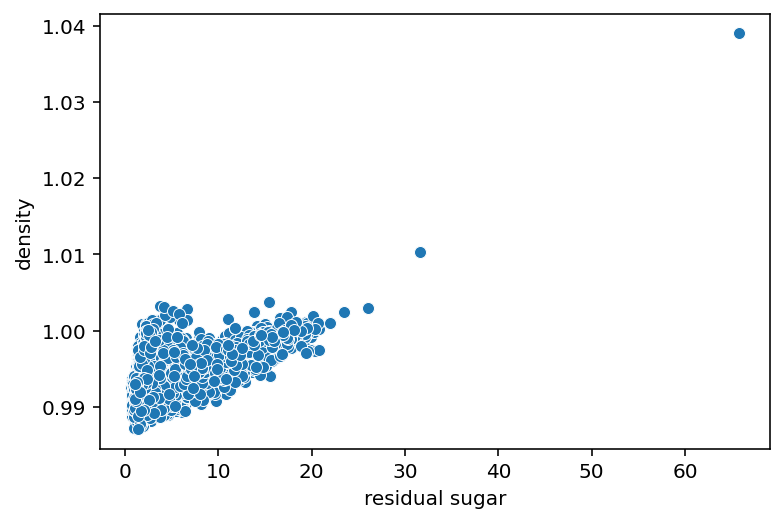

In [7]:
# Scatter Plot을 그릴 변수 지정 (x_data 에는 residual sugar변수, y_data 에는 density 변수)
x_data = train['residual sugar']
y_data = train['density']

# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.
sns.scatterplot(x_data, y_data)


## VIF

In [8]:
# train 데이터중 카테고리형 변수인 'type' 변수 제거
train.drop('type', inplace=True, axis=1)

# 결과값을 저장할 VIF라는 이름의 리스트 생성
vif = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정  - for 반복문 이용
for i in range(len(train.columns)):
  vif.append(variance_inflation_factor(train_val, i))

vif

[4.007175138928272,
 64.10743200252591,
 59.14918709853955,
 9.610687118796196,
 9.273443884294641,
 3.616414435307183,
 5.715980882977762,
 8.420882621285777,
 14.833789006276412,
 945.3239910887048,
 583.5011867251005,
 18.535849630077276,
 131.12669981396292]

In [9]:
# 데이터 프레임 형식으로 바꿔 가독성 높이기! (보너스 문제)
vif_df = pd.DataFrame()
vif_df['columns'] = train.columns
vif_df['vif'] = vif
vif_df

,columns,vif
0,index,4.007175
1,quality,64.107432
2,fixed acidity,59.149187
3,volatile acidity,9.610687
4,citric acid,9.273444
5,residual sugar,3.616414
6,chlorides,5.715981
7,free sulfur dioxide,8.420883
8,total sulfur dioxide,14.833789
9,density,945.323991
